In [ ]:
# This code performs the in silico simulation for plotting activities of each PQN unit
# To execute this code, please program the vivado project "PQNtest" on the FPGA. 
# The results of the simulation are stored in ../outputs/PQNtest/ folder.

In [1]:
import serial
import time
import threading
import matplotlib.pyplot as plt
import os
import platform
import psutil
import csv
import numpy as np
import pandas as pd

In [2]:
BIT_DECIMAL=10   
B=BIT_DECIMAL
BIT_ALL=18
BIT_INTEGER=BIT_ALL-BIT_DECIMAL
def signal_value_to_str(value):
    x=value
    bit_str=""
    j=0
    x0=x
    if x>=2**BIT_INTEGER or x<=-2**BIT_INTEGER:
        prnt("ERROR "+coe+" is too larger or small!!!")
    if x>=0:
        bit_str+="0"
        for i in range(BIT_ALL-1):
            if x >= 2**(-(i-BIT_INTEGER+2)):
                x=x-2**(-(i-BIT_INTEGER+2))
                bit_str+="1"
            else:
                bit_str+="0"
    else:
        bit_str+="1"
        x=x+2**(-BIT_DECIMAL)
        for i in range(BIT_ALL-1):
            if x <= -2**(-(i-BIT_INTEGER+2)):
                x=x+2**(-(i-BIT_INTEGER+2))
                bit_str+="0"
            else:
                bit_str+="1"            
    return bit_str

data stats 1501
0.005001544952392578 1
0.11399650573730469 2
0.20799970626831055 3
0.3139975070953369 4
0.40900254249572754 5
0.5199975967407227 6
0.6119973659515381 7
0.7072052955627441 8
0.8191483020782471 9
0.91314697265625 10
1.0027179718017578 11
1.112811803817749 12
1.2068872451782227 13
1.316530704498291 14
1.4105679988861084 15
1.5061619281768799 16
1.6171619892120361 17
1.7111034393310547 18
1.8061583042144775 19
1.91666841506958 20
2.010765790939331 21
2.106550693511963 22
2.215494155883789 23
2.308547258377075 24
2.4058148860931396 25
2.5136611461639404 26
2.6071128845214844 27
2.7020561695098877 28
2.8120620250701904 29
2.906106948852539 30
3.016268730163574 31
3.1112167835235596 32
3.207235336303711 33
3.3016245365142822 34
3.412623643875122 35
3.505627393722534 36
3.6177806854248047 37
3.711561441421509 38
3.8034942150115967 39
3.912559986114502 40
4.00873327255249 41
4.101904392242432 42
4.2139012813568115 43
4.307878732681274 44
4.416876554489136 45
4.5118749141693115 4

36.90378999710083 370
37.01372838020325 371
37.10878276824951 372
37.20272731781006 373
37.314783811569214 374
37.40878343582153 375
37.50576210021973 376
37.61477565765381 377
37.708744049072266 378
37.80616283416748 379
37.916767597198486 380
38.01276111602783 381
38.10881686210632 382
38.203758239746094 383
38.31680607795715 384
38.411752462387085 385
38.505889892578125 386
38.61688423156738 387
38.711891174316406 388
38.80694651603699 389
38.91688823699951 390
39.01088547706604 391
39.10588812828064 392
39.21788311004639 393
39.31188988685608 394
39.4078848361969 395
39.516886711120605 396
39.61388802528381 397
39.708882093429565 398
39.803889751434326 399
39.911890268325806 400
40.01089096069336 401
40.10887861251831 402
40.2209415435791 403
40.31588315963745 404
40.407883405685425 405
40.52095699310303 406
40.6139395236969 407
40.709100008010864 408
40.82024002075195 409
40.91672921180725 410
41.00534176826477 411
41.11628341674805 412
41.21134662628174 413
41.303290367126465 414

74.10595178604126 742
74.2162070274353 743
74.31076288223267 744
74.40675187110901 745
74.50475096702576 746
74.61375212669373 747
74.7097532749176 748
74.80575323104858 749
74.9147515296936 750
75.0157516002655 751
75.11075353622437 752
75.22275233268738 753
75.31675291061401 754
75.4147527217865 755
75.52375435829163 756
75.62081456184387 757
75.71681380271912 758
75.81175565719604 759
75.92281651496887 760
76.01176738739014 761
76.10573434829712 762
76.21572399139404 763
76.3091254234314 764
76.40407204627991 765
76.51612496376038 766
76.60999250411987 767
76.70399975776672 768
76.81599402427673 769
76.90999817848206 770
77.00504755973816 771
77.11599850654602 772
77.21099495887756 773
77.30433821678162 774
77.41473031044006 775
77.5101113319397 776
77.60231685638428 777
77.71173143386841 778
77.805983543396 779
77.91596961021423 780
78.01097702980042 781
78.10802578926086 782
78.20102524757385 783
78.31203246116638 784
78.40598011016846 785
78.51677107810974 786
78.61292743682861 7

110.721018075943 1108
110.8127384185791 1109
110.90878319740295 1110
111.0137689113617 1111
111.10980105400085 1112
111.20580697059631 1113
111.30185580253601 1114
111.41380620002747 1115
111.50680923461914 1116
111.61677646636963 1117
111.71082186698914 1118
111.80577182769775 1119
111.91788148880005 1120
112.01147747039795 1121
112.1065263748169 1122
112.22059893608093 1123
112.31260085105896 1124
112.4066047668457 1125
112.50177097320557 1126
112.61174249649048 1127
112.7087414264679 1128
112.80374670028687 1129
112.91277575492859 1130
113.00495767593384 1131
113.1159565448761 1132
113.21295642852783 1133
113.30595993995667 1134
113.41695761680603 1135
113.51300883293152 1136
113.60700917243958 1137
113.70316576957703 1138
113.811110496521 1139
113.90710926055908 1140
114.0015778541565 1141
114.10973119735718 1142
114.20392107963562 1143
114.31500840187073 1144
114.41100788116455 1145
114.50601053237915 1146
114.61701083183289 1147
114.71200776100159 1148
114.80900883674622 1149
114

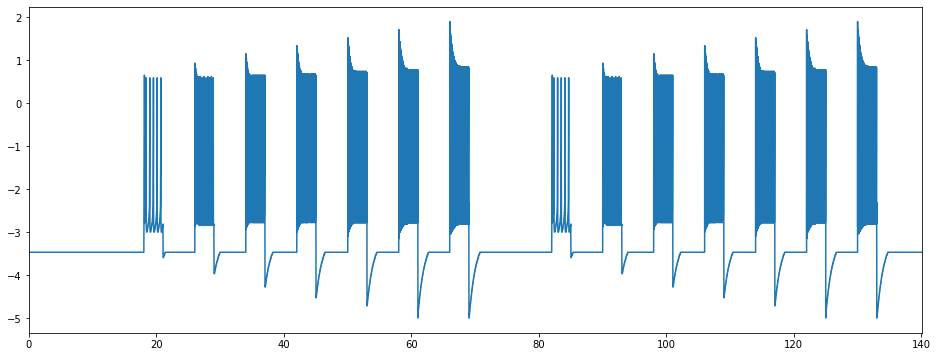

a


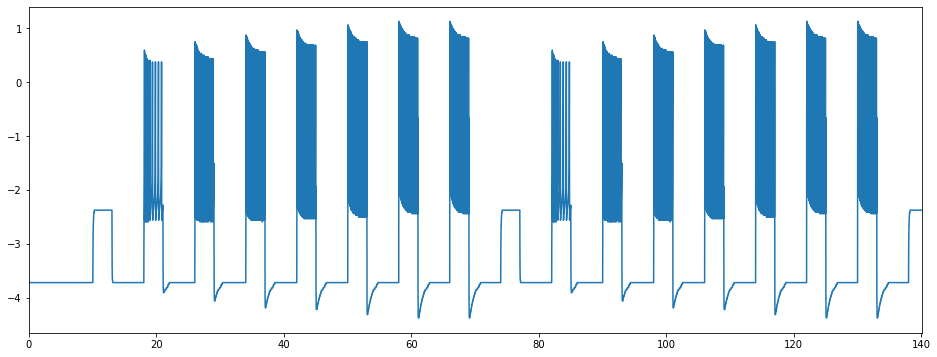

a


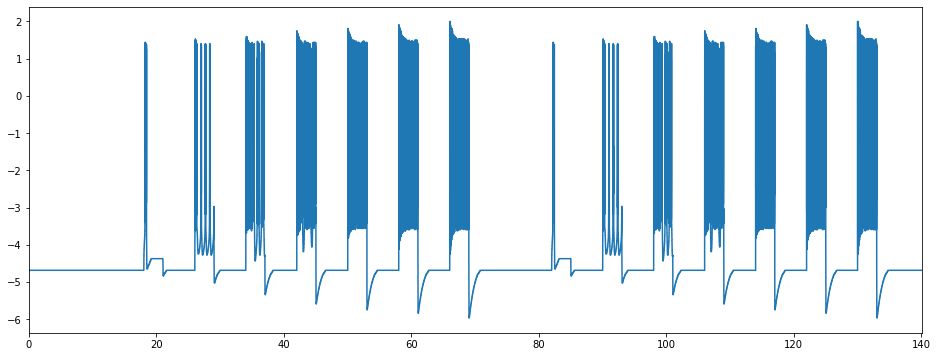

a


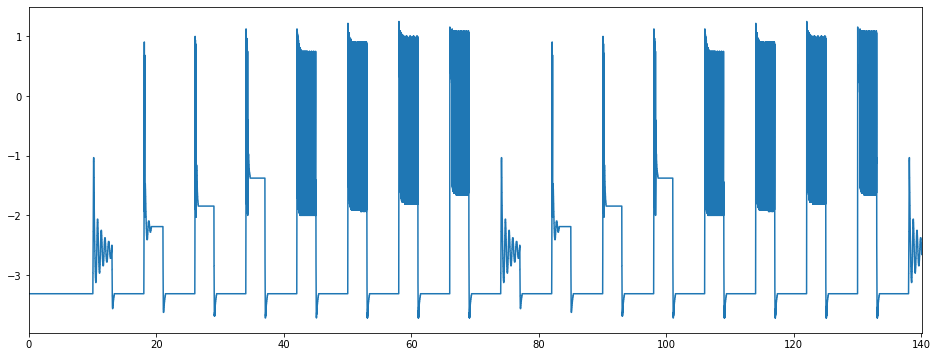

a


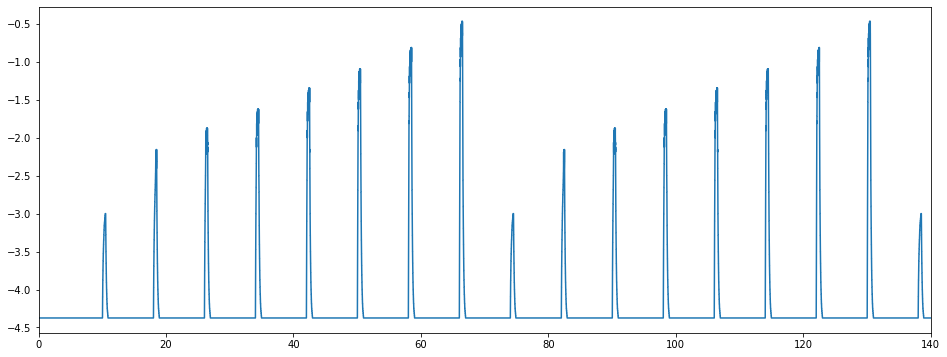

a


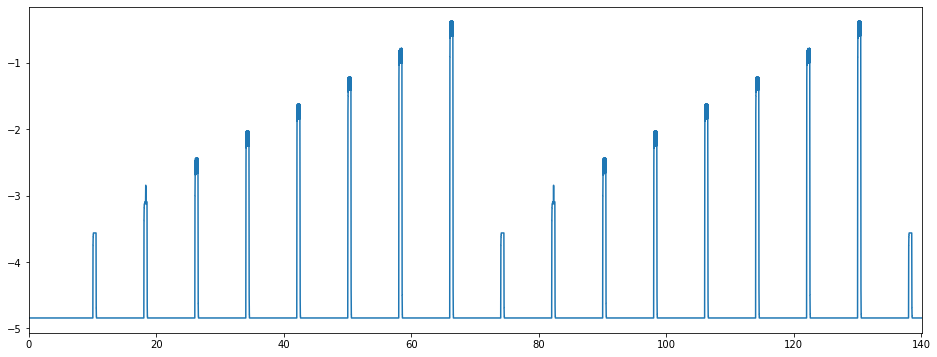

a


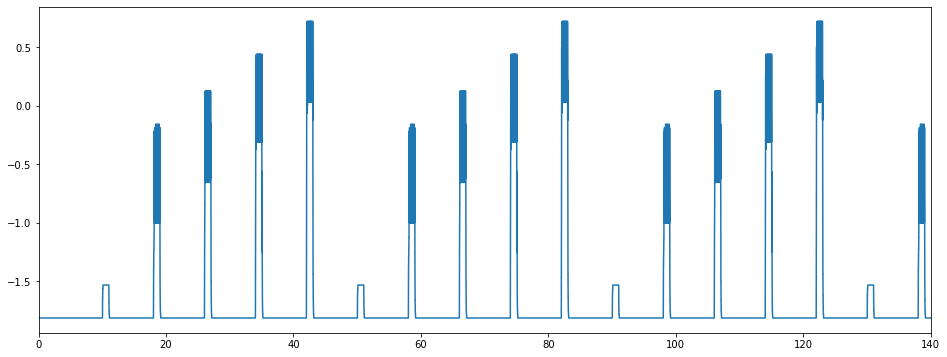

a


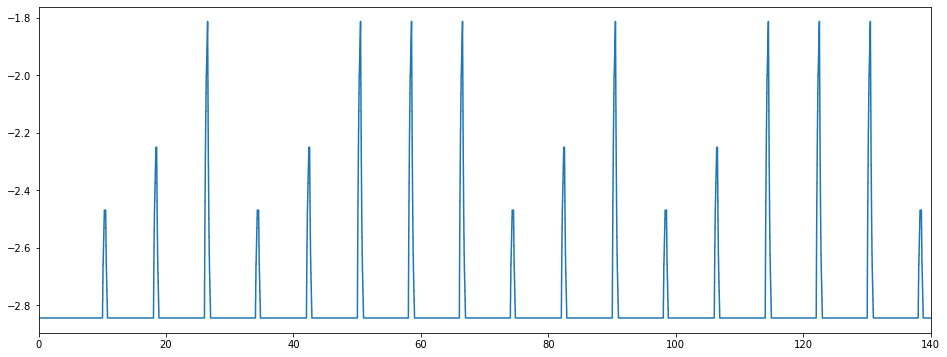

a


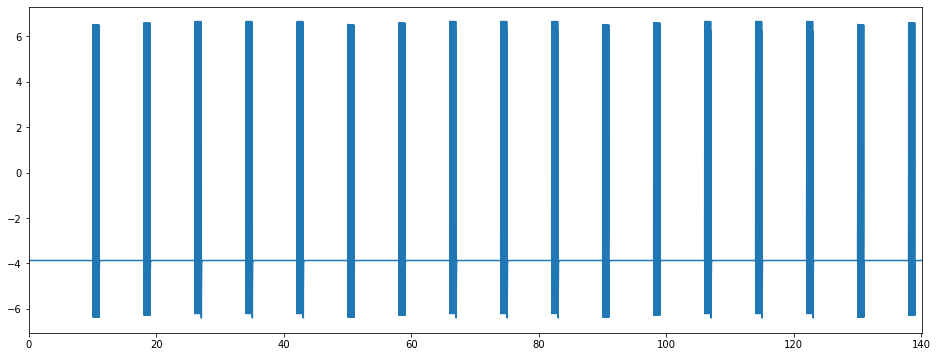

In [3]:
def receiver2():
    global receiver_stop_flag
    receiver_stop_flag=0
    while receiver_stop_flag==0:
        try:
            line = ser.read(1)
            print("received:",int(line.hex(),16))
        except ValueError as e:
            print(e)
def receiver():
    px=[]
    py=[]
    vstr=[]
    global receiver_stop_flag
    receiver_stop_flag=0
    cmap = plt.get_cmap("tab10")
    c0=0
    t0=[]
    while receiver_stop_flag==0:
        try:
            line = ser.readline()
            str=list(line)
            spre=0
            spre_flag=0
            c0+=1
            if len(str)==19:
                for i in range(18):
                    vstr.append(str.pop(0))
            else:
                print("packet num error",len(str))
            t0.append(c0*0.001)
        except ValueError as e:
            print(e)
    global gt0,gw0,gw1,gw2,gw3,gw4,gw5,gw6,gw7,gw8
    for j in range(9):
        v0=[]
        t1=[]
        print("a")
        n0=9*2
        for i in range(int(len(vstr)/n0)):
            if vstr[i*n0+2*j]>=2**6 and vstr[i*n0+2*j]<2**7 and vstr[i*n0+2*j+1]>=2**6 and vstr[i*n0+2*j+1]<2**7:
                x0=(vstr[i*n0+2*j]-2**6)*2**11+(vstr[i*n0+2*j+1]-2**6)*2**5
                if x0>=2**16:
                    x0=x0-2**17
                #if x0/2**10 >-8 and x0/2**10 < 8:
                v0.append(x0/2**10)
                t1.append(t0[i])
        plt.figure(figsize=(16,6))
        plt.xlim(0,c0*0.001)
        plt.plot(t1,v0)
        if j==0:
            gt0=t1
            gw0=v0
        if j==1:
            gw1=v0
        if j==2:
            gw2=v0
        if j==3:
            gw3=v0
        if j==4:
            gw4=v0
        if j==5:
            gw5=v0
        if j==6:
            gw6=v0
        if j==7:
            gw7=v0
        if j==8:
            gw8=v0
        plt.show()
    global receiver_stop_flag2
    receiver_stop_flag2=1
            
class data:
    def __init__(self,filename,tw):
        self.filename=filename
        self.datalists=[]
        self.datalist=[]
        self.tw=tw
        self.c0=0
    def datalist_add(self,id):
        idpre=int(id/2**6)
        idpost=id-idpre*2**6
        self.datalist.append(idpre+2**6)
        self.datalist.append(idpost+2**7)
    def datalist_end(self):
        self.datalist.append(10)
    def datalist_get(self):
        if len(self.datalists)>0:
            return self.datalists.pop(0)
    def fileopen(self):
        dt=0.001
        with open(self.filename,'r') as f:
            reader = csv.reader(f)
            self.c0=0
            for line in reader:
                while self.c0*dt<float(line[0]):
                    self.datalist_end()
                    self.c0+=1
                    if self.c0%(int(self.tw/0.001))==0:
                        self.datalists.append(self.datalist)
                        self.datalist=[]
                self.datalist_add(int(float(line[1])))
                global tmax
                if len(self.datalists)>tmax*10:
                    print("data stats",len(self.datalists))
                    return 0
    def plot(self):
        x=[]
        y=[]
        with open(self.filename,'r') as f:
            reader = csv.reader(f)
            for line in reader:
                if float(line[0])<100 and float(line[1])<100:
                    x.append(float(line[0]))
                    y.append(int(line[1]))
        plt.figure(figsize=(16,8))
        plt.scatter(x,y,s=1)
        for j in range(20):
            plt.plot([5*j,5*j],[0,100])
        plt.show()
    def insert_signal(self,t0,signal):
        if t0>=len(self.datalists):
            print(t0,"insert error : is too large")
        else:
            self.datalists[t0].pop(len(self.datalists[t0])-1)
            a0=send_id(signal)
            for a in a0:
                self.datalists[t0].append(a)
            self.datalists[t0].append(10)
def send_id(id):
    d0=[]
    idpre=int(id/2**6)
    idpost=id-idpre*2**6
    d0.append(idpre+2**6)
    d0.append(idpost+2**7)
    return d0        

global tmax,P
tmax=150
P=6
proc = psutil.Process( os.getpid() )
proc.nice( psutil.REALTIME_PRIORITY_CLASS)
filename='../outputs/ORNcsv/ORN_4000s'
d0=data(filename+".csv",0.1)
d0.fileopen()
ser = serial.Serial("COM4", baudrate=4000000, bytesize=serial.EIGHTBITS, parity=serial.PARITY_NONE)
thread1 = threading.Thread(target=receiver)
thread1.start()
t1=time.time()
t2=time.time()
k0=0
d0.insert_signal(100,1389+2218) #0.1s
while t2-t1<tmax-10:
    ser.write(d0.datalist_get())
    k0+=1
    t2=time.time()
    time.sleep(0.1*k0-(t2-t1))
    print(t2-t1,k0)
global receiver_stop_flag
receiver_stop_flag=1
global receiver_stop_flag2
receiver_stop_flag2=0
while receiver_stop_flag2==0:
   ;



In [4]:
import pickle
filename0="../outputs/PQNtest/"
def save_gw(data,name):
    file = open(filename0+name+".txt", 'wb')
    pickle.dump(data, file)
save_gw(gt0,"gt0")
save_gw(gw0,"gw0")
save_gw(gw1,"gw1")
save_gw(gw2,"gw2")
save_gw(gw3,"gw3")
save_gw(gw4,"gw4")
save_gw(gw5,"gw5")
save_gw(gw6,"gw6")
save_gw(gw7,"gw7")
save_gw(gw8,"gw8")